In [28]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pytube import YouTube

In [14]:
# URL del video de YouTube
url = "https://www.youtube.com/watch?v=TGbwL8kSpEk"

# Descargar el audio del video de YouTube
yt = YouTube(url)
audio_stream = yt.streams.filter(only_audio=True).first()

In [17]:
audio_stream.download(output_path="./", filename="cancion3.mp3")

'C:\\Users\\Janus\\Documents\\laydihacks\\maestria\\TFM\\lh-m-tfm-codes\\./cancion3.mp3'

In [23]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

In [31]:
import os

# Obtener la ruta de la carpeta actual
carpeta_actual = os.getcwd()

# Listar los archivos en la carpeta actual
archivos_en_carpeta = os.listdir(carpeta_actual)

# Mostrar la lista de archivos
archivos_en_carpeta

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'cancion3.mp3',
 'data',
 'he.py',
 'soun1.mp3',
 'Untitled.ipynb']

In [33]:
# Cargar el archivo de audio
archivo_audio = 'soun1.mp3'

# Cargar el archivo de audio usando soundfile
audio, sr = sf.read(archivo_audio)

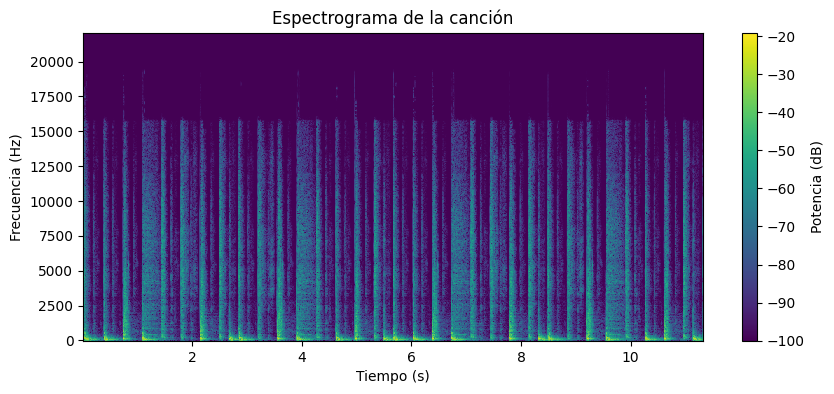

In [35]:
# Asegurarse de que la señal de audio sea mono (si es estéreo)
if len(audio.shape) == 2:
    audio = audio.mean(axis=1)

# Calcular el espectrograma usando scipy.signal.spectrogram
f, t, Sxx = spectrogram(audio, fs=sr, nperseg=1024, noverlap=512)  # Ajusta estos parámetros según sea necesario

# Visualizar el espectrograma
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='auto')  # Agrega una pequeña constante para evitar logaritmos de cero
plt.colorbar(label='Potencia (dB)')
plt.title('Espectrograma de la canción')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

In [36]:
# Cargar la señal de audio y la tasa de muestreo
cancion = "soun1.mp3"
audio, sr = librosa.load(cancion)

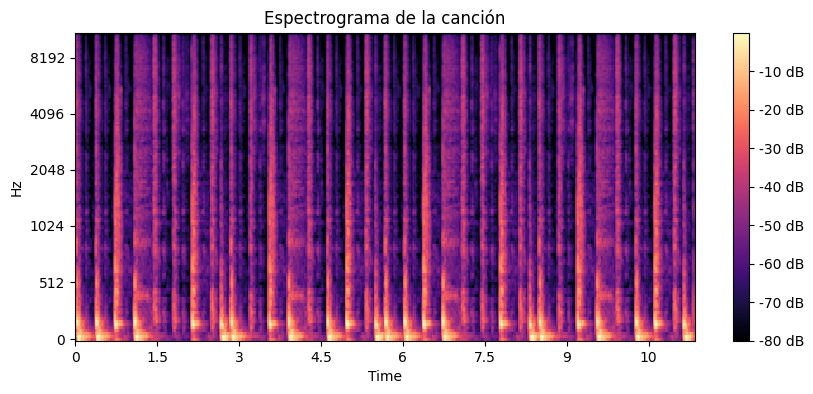

In [37]:

# Generar el espectrograma
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la canción')
plt.show()

pRUEBAS https://www.youtube.com/watch?v=n-99mmIBp-g&ab_channel=Sounds%2CTones%2CNoises%2CChirps

In [41]:
# Cargar la señal de audio y la tasa de muestreo
cancion = "512c.mp3"
audio, sr = librosa.load(cancion)

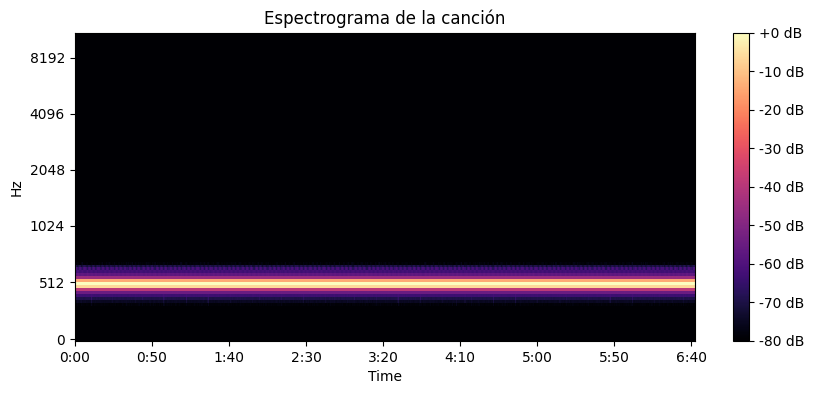

In [38]:
# Cargar la señal de audio y la tasa de muestreo
cancion = "512c.mp3"
audio, sr = librosa.load(cancion)
# Generar el espectrograma
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la canción')
plt.show()

Frecuencia dominante: -512.0004769018435 Hz
Amplitud del pico: 2798389.176754737


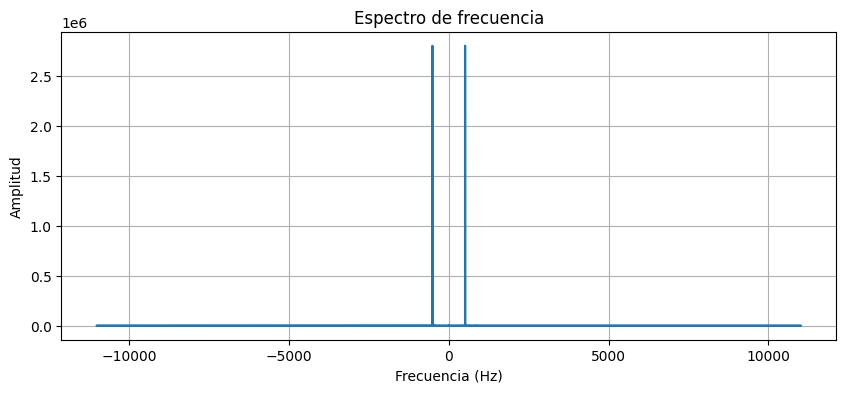

In [42]:
# Calcular la transformada de Fourier de la señal de audio
fft_resultado = np.fft.fft(audio)
frecuencias = np.fft.fftfreq(len(fft_resultado), 1/sr)

# Encontrar el índice de la frecuencia dominante (pico)
indice_pico = np.argmax(np.abs(fft_resultado))
frecuencia_pico = frecuencias[indice_pico]

# Calcular la amplitud del pico
amplitud_pico = np.abs(fft_resultado[indice_pico])

# Mostrar la frecuencia y amplitud del pico
print(f"Frecuencia dominante: {frecuencia_pico} Hz")
print(f"Amplitud del pico: {amplitud_pico}")

# Visualizar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(frecuencias, np.abs(fft_resultado))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

In [43]:
# Cargar la señal de audio y la tasa de muestreo
cancion = "528c.mp3"
audio, sr = librosa.load(archivo_audio, mono=False)  # Cargar el audio en estéreo (dos canales)

# Verificar si los canales izquierdo y derecho son diferentes
diferentes = not (audio[0] == audio[1]).all()

if diferentes:
    print("El audio es binaural (estéreo con contenido diferente en los canales).")
else:
    print("El audio no es binaural (los canales izquierdo y derecho son idénticos).")
    

El audio es binaural (estéreo con contenido diferente en los canales).


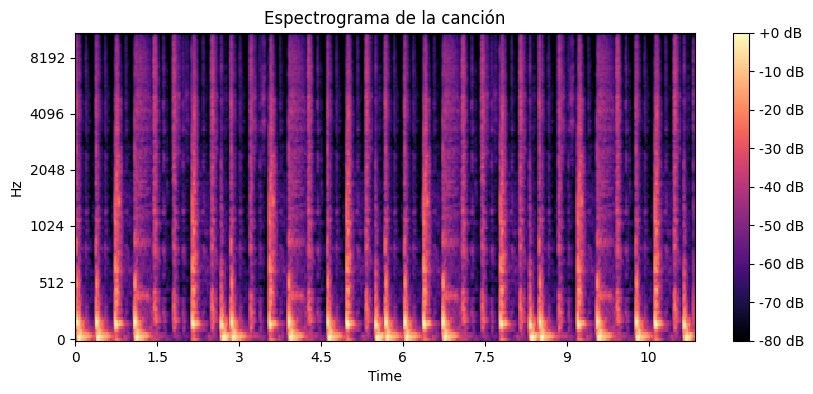

In [46]:
# Generar el espectrograma
spectrogram = librosa.feature.melspectrogram(y=audio[0], sr=sr)

# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la canción')
plt.show()

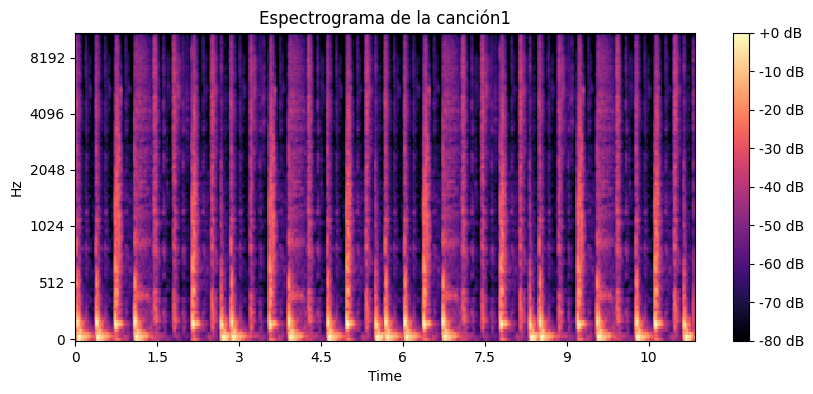

In [50]:
# Generar el espectrograma
spectrogram1 = librosa.feature.melspectrogram(y=audio[1], sr=sr)

# Mostrar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram1, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la canción1')
plt.show()

Frecuencia dominante: 44.6320564516129 Hz
Amplitud del pico: 6481.831123453602


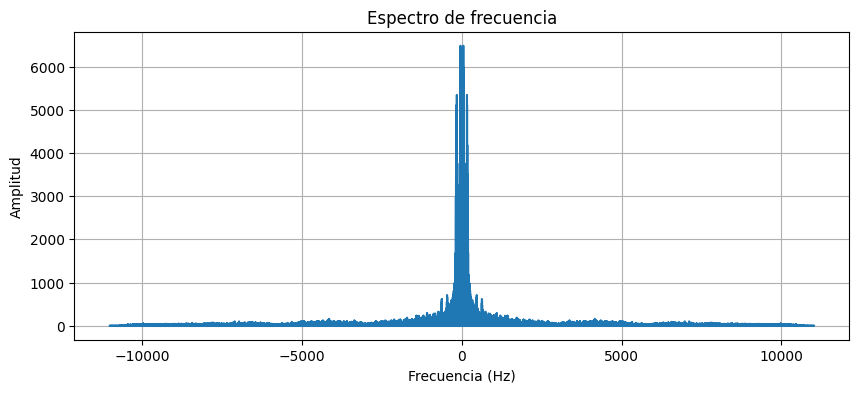

In [48]:
# Calcular la transformada de Fourier de la señal de audio
fft_resultado = np.fft.fft(audio[0])
frecuencias = np.fft.fftfreq(len(fft_resultado), 1/sr)

# Encontrar el índice de la frecuencia dominante (pico)
indice_pico = np.argmax(np.abs(fft_resultado))
frecuencia_pico = frecuencias[indice_pico]

# Calcular la amplitud del pico
amplitud_pico = np.abs(fft_resultado[indice_pico])

# Mostrar la frecuencia y amplitud del pico
print(f"Frecuencia dominante: {frecuencia_pico} Hz")
print(f"Amplitud del pico: {amplitud_pico}")

# Visualizar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(frecuencias, np.abs(fft_resultado))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Frecuencia dominante: 44.6320564516129 Hz
Amplitud del pico: 7037.538067519119


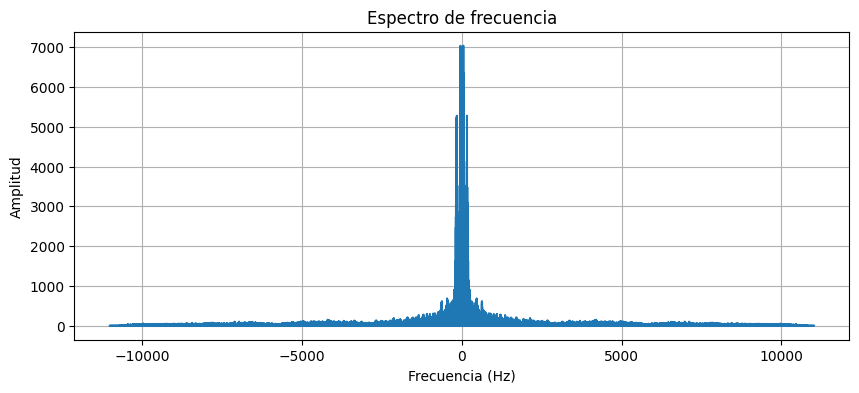

In [49]:
# Calcular la transformada de Fourier de la señal de audio
fft_resultado = np.fft.fft(audio[1])
frecuencias = np.fft.fftfreq(len(fft_resultado), 1/sr)

# Encontrar el índice de la frecuencia dominante (pico)
indice_pico = np.argmax(np.abs(fft_resultado))
frecuencia_pico = frecuencias[indice_pico]

# Calcular la amplitud del pico
amplitud_pico = np.abs(fft_resultado[indice_pico])

# Mostrar la frecuencia y amplitud del pico
print(f"Frecuencia dominante: {frecuencia_pico} Hz")
print(f"Amplitud del pico: {amplitud_pico}")

# Visualizar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(frecuencias, np.abs(fft_resultado))
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

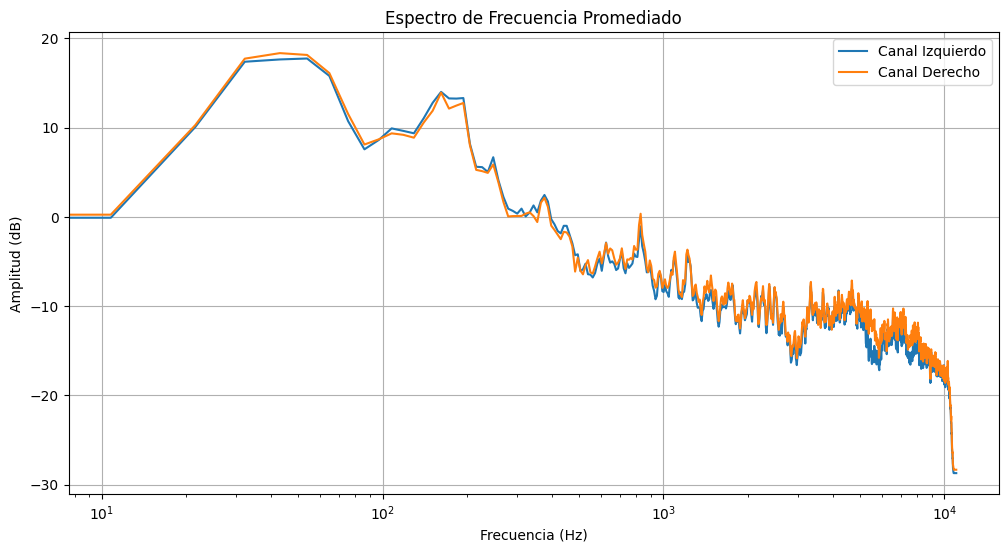

In [53]:


# Calcular la transformada de Fourier para ambos canales
fft_izquierdo = librosa.stft(audio[0])
fft_derecho = librosa.stft(audio[1])

# Calcular las amplitudes en dB
amplitud_izquierdo = librosa.amplitude_to_db(abs(fft_izquierdo))
amplitud_derecho = librosa.amplitude_to_db(abs(fft_derecho))

# Crear un rango de frecuencias
frecuencias = librosa.core.fft_frequencies(sr=sr)

# Promediar las amplitudes en cada frecuencia
promedio_amplitud_izquierdo = np.mean(amplitud_izquierdo, axis=1)
promedio_amplitud_derecho = np.mean(amplitud_derecho, axis=1)

# Graficar el espectro de frecuencia promediado para ambos canales
plt.figure(figsize=(12, 6))
plt.semilogx(frecuencias, promedio_amplitud_izquierdo, label='Canal Izquierdo')
plt.semilogx(frecuencias, promedio_amplitud_derecho, label='Canal Derecho')
plt.title('Espectro de Frecuencia Promediado')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.legend()
plt.grid()
plt.show()

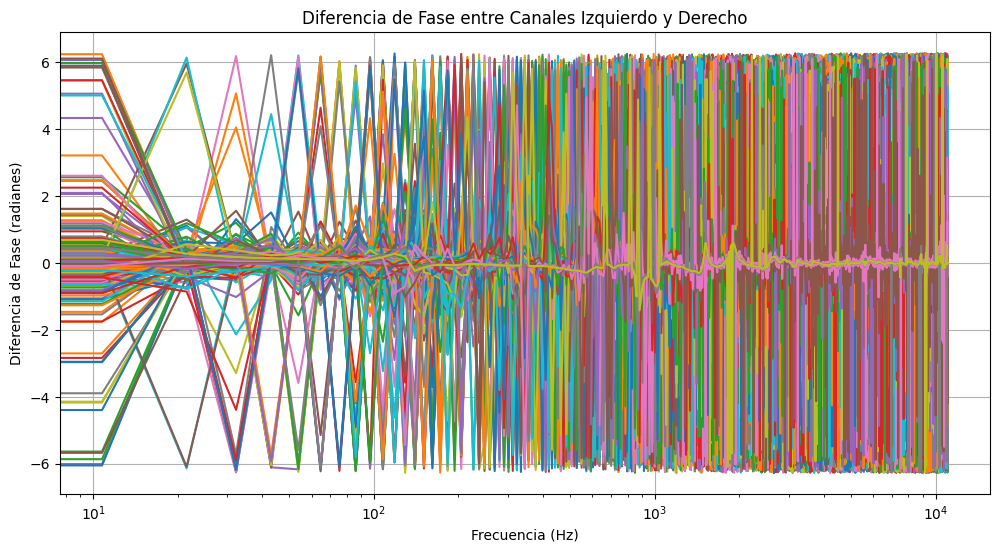

Desfase promedio en radianes: 0.0016720334533602
Desfase promedio en grados: 0.09580045193433762 grados


In [54]:
# Calcular la fase para ambos canales
fase_izquierdo = np.angle(fft_izquierdo)
fase_derecho = np.angle(fft_derecho)

# Calcular la diferencia de fase entre los canales
diferencia_fase = fase_izquierdo - fase_derecho

# Calcular la frecuencia correspondiente a cada bin de la FFT
frecuencias = librosa.core.fft_frequencies(sr=sr)

# Graficar la diferencia de fase en función de la frecuencia
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.semilogx(frecuencias, diferencia_fase)
plt.title('Diferencia de Fase entre Canales Izquierdo y Derecho')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Diferencia de Fase (radianes)')
plt.grid()
plt.show()

# Calcular el desfase promedio en radianes
desfase_promedio = np.mean(diferencia_fase)

# Convertir el desfase promedio a grados
desfase_promedio_grados = np.degrees(desfase_promedio)
print(f"Desfase promedio en radianes: {desfase_promedio}")
print(f"Desfase promedio en grados: {desfase_promedio_grados} grados")